In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

C:\Users\NAGA SAI SAMYUKTHA\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
sales = pd.read_csv("100_Sales.csv")
sales

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Ship_Date,Unit_Cost,Total_Revenue,Total_Profit,Unnamed: 9,Unnamed: 10
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,27/06/2010,159.42,2533654.00,951410.50,NaN,NaN
1,Central America and the Caribbean,Grenada,Cereal,Online,C,15/09/2012,117.11,576782.80,248406.36,NaN,NaN
2,Europe,Russia,Office Supplies,Offline,L,05/08/2014,524.96,1158502.59,224598.75,NaN,NaN
3,Sub_Saharan Africa,Sao Tome and Principe,Fruits,Online,C,07/05/2014,6.92,75591.66,19525.82,NaN,NaN
4,Sub_Saharan Africa,Rwanda,Office Supplies,Offline,L,02/06/2013,524.96,3296425.02,639077.50,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95,Sub_Saharan Africa,Mali,Clothes,Online,M,09/03/2011,35.84,97040.64,65214.72,NaN,NaN
96,Asia,Malaysia,Fruits,Offline,L,28/12/2011,6.92,58471.11,15103.47,NaN,NaN
97,Sub_Saharan Africa,Sierra Leone,Vegetables,Offline,C,29/06/2016,90.93,228779.10,93748.05,NaN,NaN
98,North America,Mexico,Personal Care,Offline,M,08/08/2015,56.67,471336.91,144521.02,NaN,NaN


In [4]:
sales = sales.drop(columns=['Unnamed: 9','Unnamed: 10'])
sales.head()

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Ship_Date,Unit_Cost,Total_Revenue,Total_Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,27/06/2010,159.42,2533654.00,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,15/09/2012,117.11,576782.80,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05/08/2014,524.96,1158502.59,224598.75
3,Sub_Saharan Africa,Sao Tome and Principe,Fruits,Online,C,07/05/2014,6.92,75591.66,19525.82
4,Sub_Saharan Africa,Rwanda,Office Supplies,Offline,L,02/06/2013,524.96,3296425.02,639077.50


In [5]:
sales['Ship_Date']= sales['Ship_Date'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))
sales['Sales_Channel'] = sales['Sales_Channel'].map({'Online': 1, 'Offline': 0})
sales.head()

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Ship_Date,Unit_Cost,Total_Revenue,Total_Profit
0,Australia and Oceania,Tuvalu,Baby Food,0,H,2010-06-27,159.42,2533654.00,951410.50
1,Central America and the Caribbean,Grenada,Cereal,1,C,2012-09-15,117.11,576782.80,248406.36
2,Europe,Russia,Office Supplies,0,L,2014-08-05,524.96,1158502.59,224598.75
3,Sub_Saharan Africa,Sao Tome and Principe,Fruits,1,C,2014-05-07,6.92,75591.66,19525.82
4,Sub_Saharan Africa,Rwanda,Office Supplies,0,L,2013-06-02,524.96,3296425.02,639077.50


In [6]:
sales.isnull().sum()

Region            0
Country           0
Item_Type         0
Sales_Channel     0
Order_Priority    0
Ship_Date         0
Unit_Cost         0
Total_Revenue     0
Total_Profit      0
dtype: int64

In [7]:
sales.describe()

,Sales_Channel,Ship_Date,Unit_Cost,Total_Revenue,Total_Profit
count,100.000000,100,100.000000,1.000000e+02,1.000000e+02
mean,0.500000,2013-10-04 02:52:48,191.048000,1.373488e+06,4.416820e+05
min,0.000000,2010-01-08 00:00:00,6.920000,4.870260e+03,1.258020e+03
25%,0.000000,2012-02-24 18:00:00,35.840000,2.687212e+05,1.214436e+05
50%,0.500000,2013-07-27 12:00:00,107.275000,7.523144e+05,2.907680e+05
75%,1.000000,2015-03-19 00:00:00,263.330000,2.212045e+06,6.358288e+05
max,1.000000,2017-06-17 00:00:00,524.960000,5.997055e+06,1.719922e+06
std,0.502519,NaN,188.208181,1.460029e+06,4.385379e+05


In [32]:
sales['Order_Priority'].unique()

array(['H', 'C', 'L', 'M'], dtype=object)

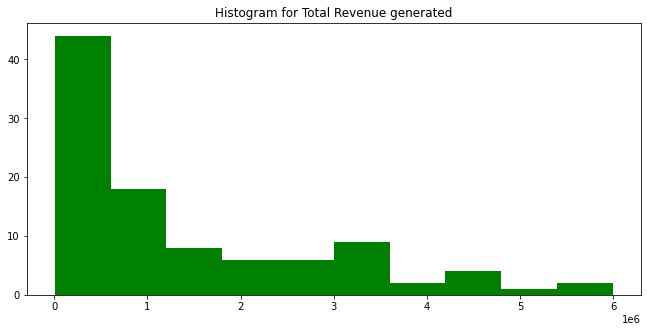

In [9]:
plt.figure(figsize=(11,5))
plt.hist(sales['Total_Revenue'],color="green")
plt.title("Histogram for Total Revenue generated")
plt.show()

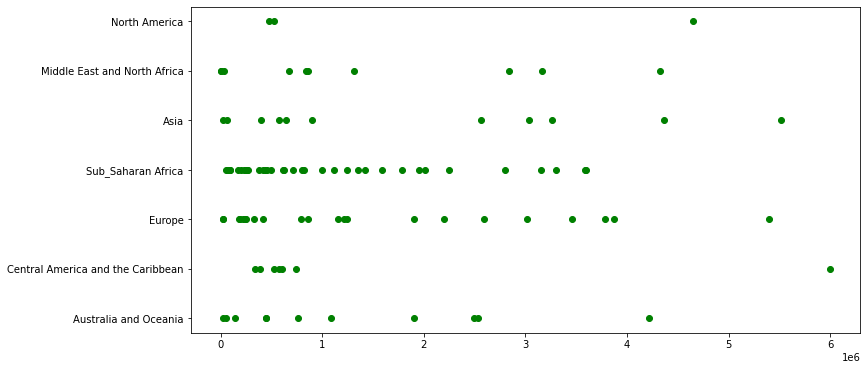

In [10]:
plt.figure(figsize=(12,6))
plt.scatter(sales["Total_Revenue"],sales["Region"],color="green")
plt.show()

The total revenue is high in the Sub_Saharan Africa Region

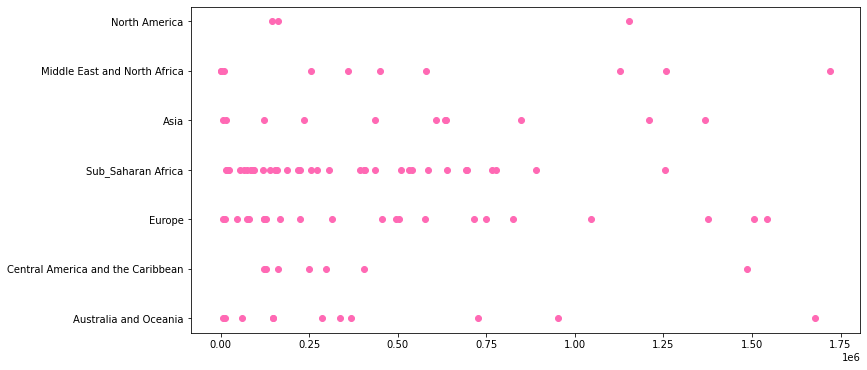

In [11]:
plt.figure(figsize=(12,6))
plt.scatter(sales["Total_Profit"],sales["Region"],color="hotpink")

The total_Profit is high in Sub_Saharan Africa Region and low in North America

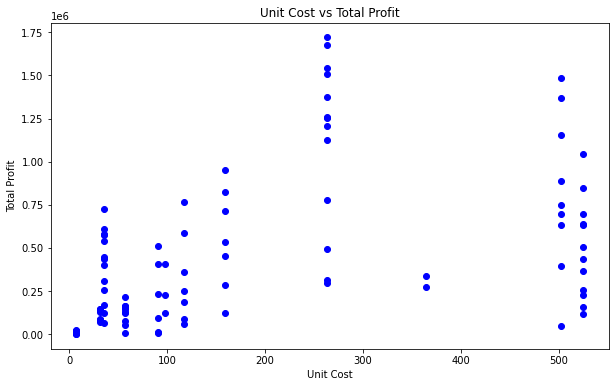

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(sales["Unit_Cost"], sales["Total_Profit"], color="blue")
plt.xlabel("Unit Cost")
plt.ylabel("Total Profit")
plt.title("Unit Cost vs Total Profit")
plt.show()


<AxesSubplot:title={'center':'Top-Selling Products by Profit'}, xlabel='Item_Type'>

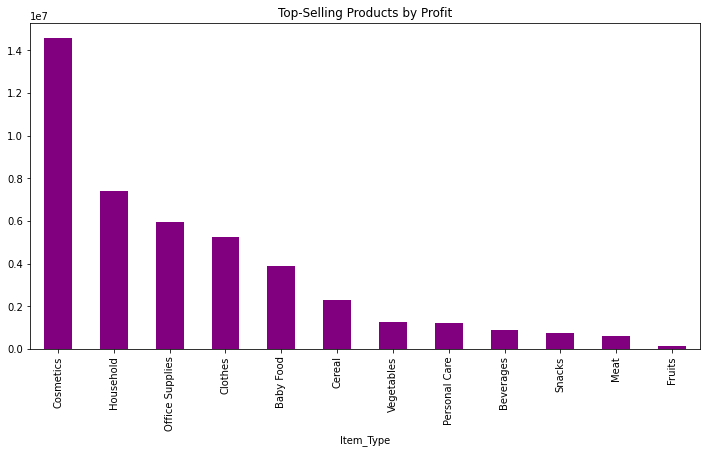

In [15]:
top_profit_items = sales.groupby("Item_Type")["Total_Profit"].sum().sort_values(ascending=False)
top_profit_items.plot(kind="bar", title="Top-Selling Products by Profit", color="purple", figsize=(12, 6))

<AxesSubplot:title={'center':'Top-Selling Products by Revenue'}, xlabel='Item_Type'>

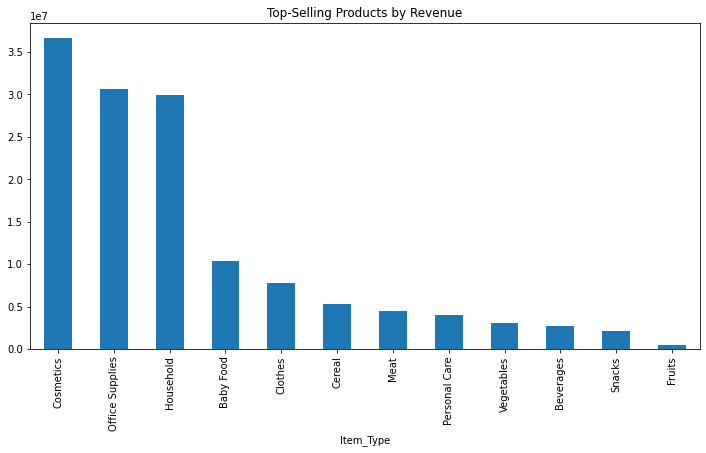

In [13]:
top_revenue_items = sales.groupby("Item_Type")["Total_Revenue"].sum().sort_values(ascending=False)
top_revenue_items.plot(kind="bar", title="Top-Selling Products by Revenue", figsize=(12, 6))

The top selling products by revenue and profit are cosmetics.
The least selling Products by revenue and Profit are fruits

<AxesSubplot:title={'center':'Revenue by Sales Channel'}, ylabel='Total_Revenue'>

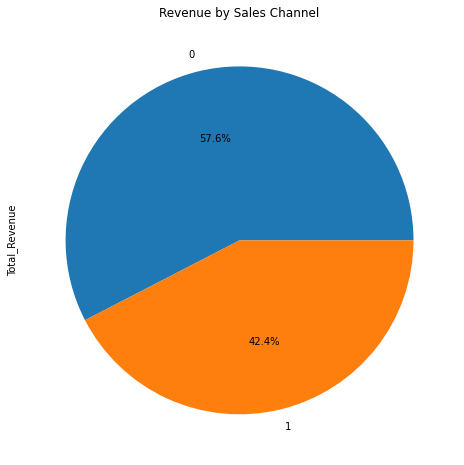

In [20]:
sales_channel_revenue = sales.groupby("Sales_Channel")["Total_Revenue"].sum()
sales_channel_revenue.plot(kind="pie",autopct='%1.1f%%',title="Revenue by Sales Channel", figsize=(8, 8))

<AxesSubplot:title={'center':'Profit by Sales Channel'}, ylabel='Total_Profit'>

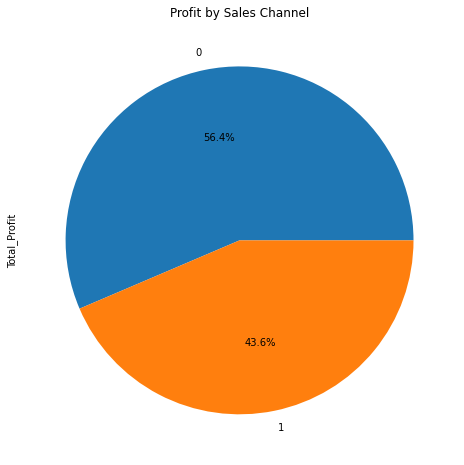

In [22]:
sales_channel_profit = sales.groupby("Sales_Channel")["Total_Profit"].sum()
sales_channel_profit.plot(kind="pie", autopct='%1.1f%%', title="Profit by Sales Channel",figsize=(8, 8))

Sales by Revenue and Profit are high in offline mode compared to the online mode

<AxesSubplot:title={'center':'Total Revenue by country'}, xlabel='Country'>

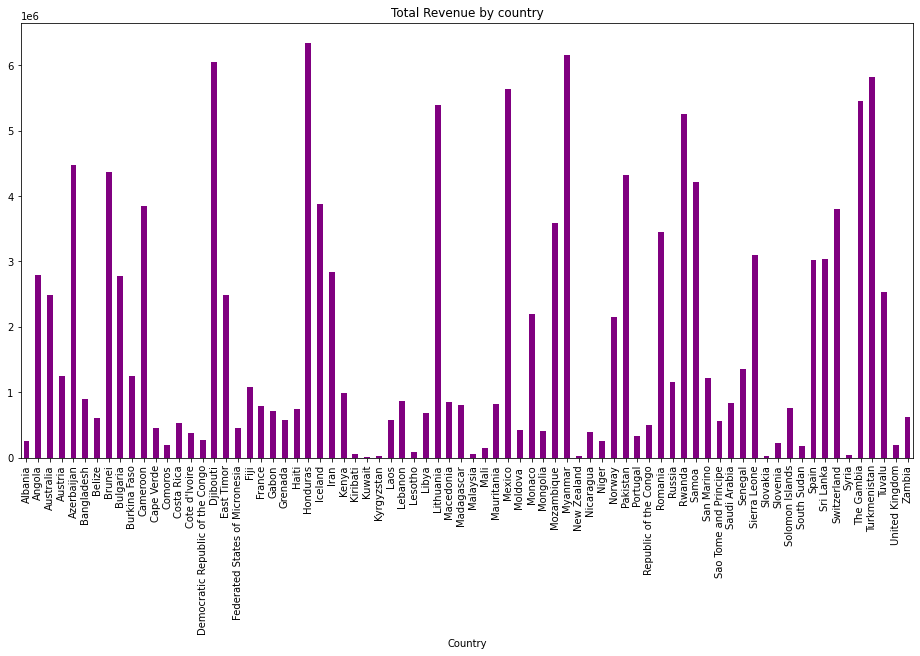

In [30]:
country_Revenue = sales.groupby("Country")["Total_Revenue"].sum()
country_Revenue.plot(kind="bar",title="Total Revenue by country",color="Purple",figsize=(16,8))

<AxesSubplot:title={'center':'Total Profit by country'}, xlabel='Country'>

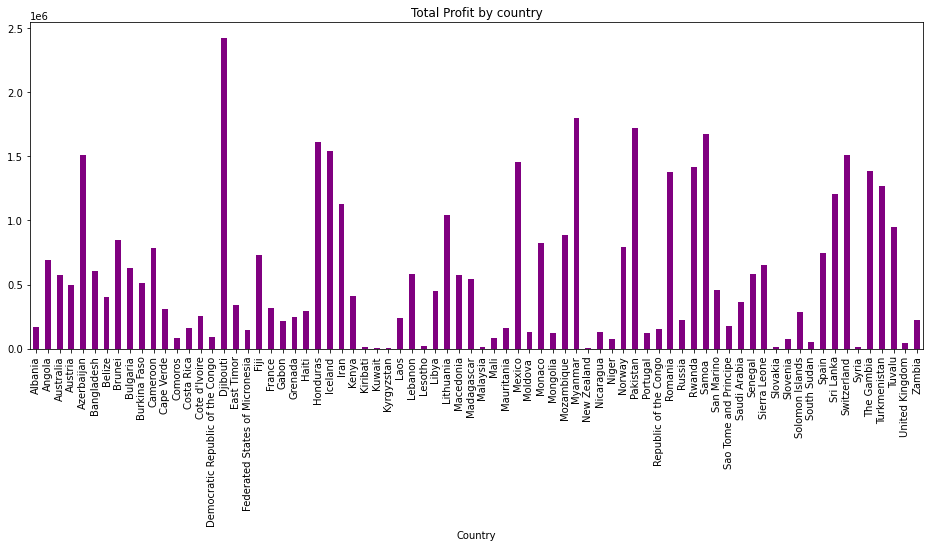

In [29]:
country_Profit = sales.groupby("Country")["Total_Profit"].sum()
country_Profit.plot(kind="bar",title="Total Profit by country",color="Purple",figsize=(16,6))

# The Country With the highest Revenue is Honduras and highest Profit is Djibouti

# The country with the lowest revenue is Kuwait and lowest profit is Kyrgyzstan

<AxesSubplot:title={'center':'Total Profit by Order Priority'}, xlabel='Order_Priority'>

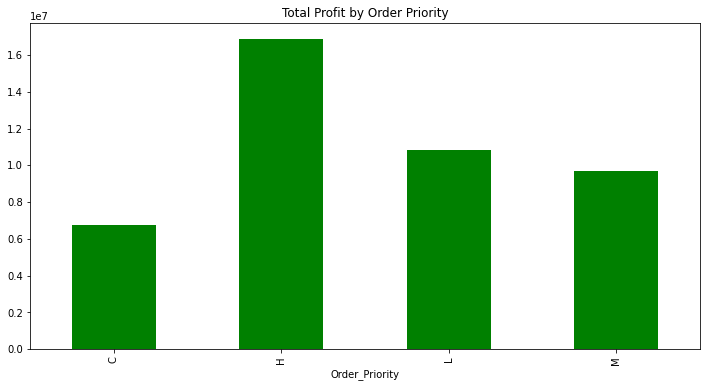

In [34]:
profit_by_priority = sales.groupby("Order_Priority")["Total_Profit"].sum()
profit_by_priority.plot(kind="bar",title="Total Profit by Order Priority",color="Green",figsize=(12,6))

<AxesSubplot:title={'center':'Total Revenue by Priority'}, xlabel='Order_Priority'>

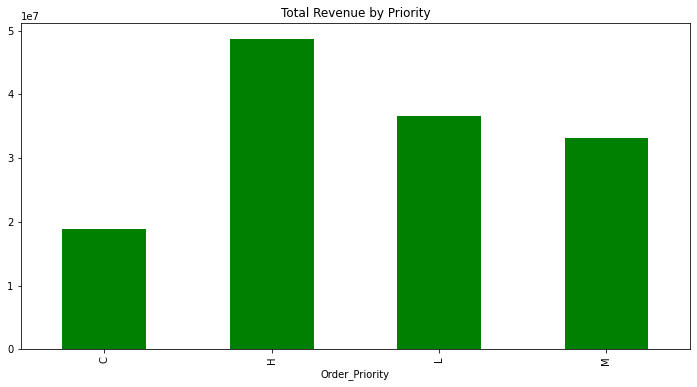

In [39]:
revenue_by_priority = sales.groupby("Order_Priority")["Total_Revenue"].sum()
revenue_by_priority.plot(kind="bar",title="Total Revenue by Priority",color="green",figsize=(12,6))

<AxesSubplot:title={'center':'Monthly Sales Trend'}, xlabel='Month'>

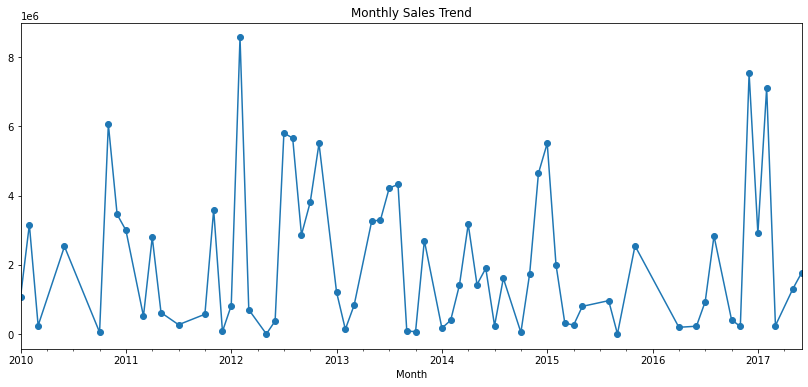

In [47]:
sales["Ship_Date"] = pd.to_datetime(sales["Ship_Date"], format='%d/%m/%Y')
sales["Month"] = sales["Ship_Date"].dt.to_period("M")
monthly_revenue = sales.groupby("Month")["Total_Revenue"].sum()
monthly_revenue.plot(kind="line", marker="o", title="Monthly Sales Trend", figsize=(14, 6))

<AxesSubplot:title={'center':'Monthly Sales Trend'}, xlabel='Month'>

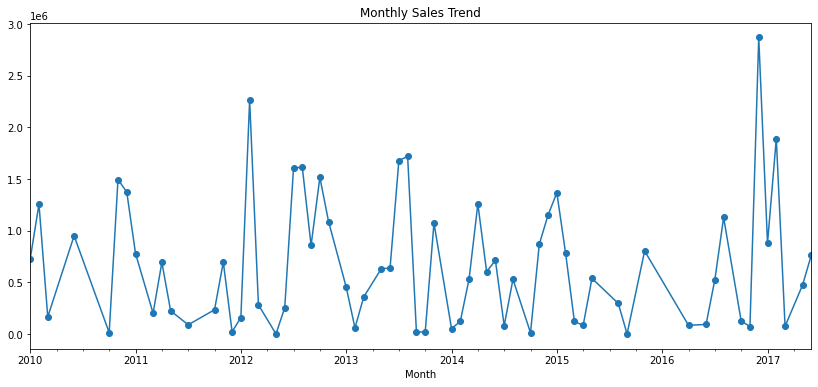

In [48]:
monthly_Profit = sales.groupby("Month")["Total_Profit"].sum()
monthly_Profit.plot(kind="line", marker="o", title="Monthly Sales Trend", figsize=(14, 6))

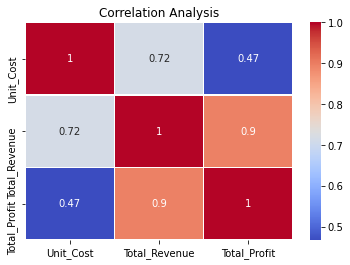

In [49]:
correlation_matrix = sales[["Unit_Cost", "Total_Revenue", "Total_Profit"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Analysis")
plt.show()